In [162]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import timeit
%matplotlib inline

In [163]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < 0.5):
          print("\nReached 0.4 loss so cancelling training!")
          self.model.stop_training = True

cb = myCallback()

In [211]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.fashion_mnist.load_data()

In [214]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [212]:
train_data.shape

(60000, 28, 28)

9


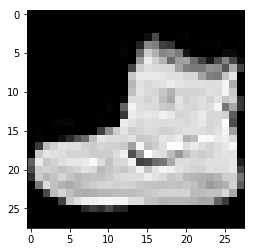

In [165]:
plt.imshow(train_data[0], cmap='gray')
print(train_labels[0])

In [170]:
train_data[0].shape

(28, 28)

In [11]:
train_data = train_data / 255.0
test_data = test_data / 255.0

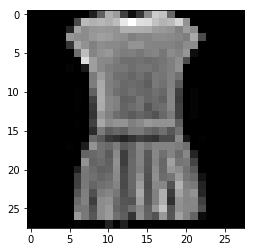

In [175]:
plt.imshow(train_data[3], cmap="gray")

9


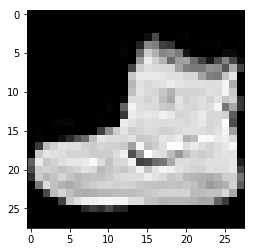

In [171]:
plt.imshow(train_data[0], cmap='gray')
print(train_labels[0])

In [210]:
train_data.shape

(60000, 28, 28, 1)

In [195]:
train_data = train_data.reshape(train_data.shape[0], 28, 28, 1)
test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)

In [13]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [15]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [17]:
start = timeit.default_timer()

print(model.fit(train_data, train_labels, epochs=5, verbose=1))

stop = timeit.default_timer()

print('Time: ', stop - start)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 28s 468us/sample - loss: 0.3683 - accuracy: 0.8666
Epoch 2/5
60000/60000 [==============================] - 31s 523us/sample - loss: 0.2849 - accuracy: 0.8949
Epoch 3/5
60000/60000 [==============================] - 31s 520us/sample - loss: 0.2441 - accuracy: 0.9104
Epoch 4/5
60000/60000 [==============================] - 32s 528us/sample - loss: 0.2124 - accuracy: 0.9204
Epoch 5/5
60000/60000 [==============================] - 32s 536us/sample - loss: 0.1874 - accuracy: 0.9300
Time:  154.74132760000066


In [18]:
start = timeit.default_timer()

print(model.evaluate(x = test_data, y = test_labels, verbose=0))

stop = timeit.default_timer()

print('Time: ', stop - start)

[0.24587677263617516, 0.9095]
Time:  1.33153011999093


In [28]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


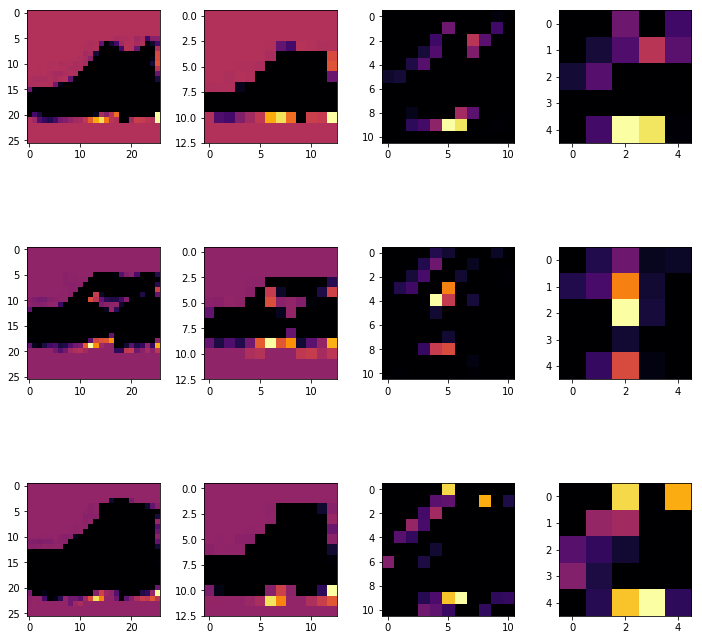

In [105]:
f, axarr = plt.subplots(3, 4, figsize=(10,10))
f.tight_layout()

FIRST_IMAGE = 0
SECOND_IMAGE =23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 22
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0, 4):
    f1 = activation_model.predict(test_data[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[0, x].grid(False)
    f2 = activation_model.predict(test_data[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[1, x].grid(False)
    f3 = activation_model.predict(test_data[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[2, x].grid(False)

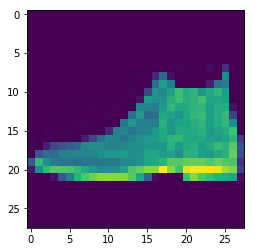

In [156]:
plt.imshow(test_data[0].reshape(28, 28)

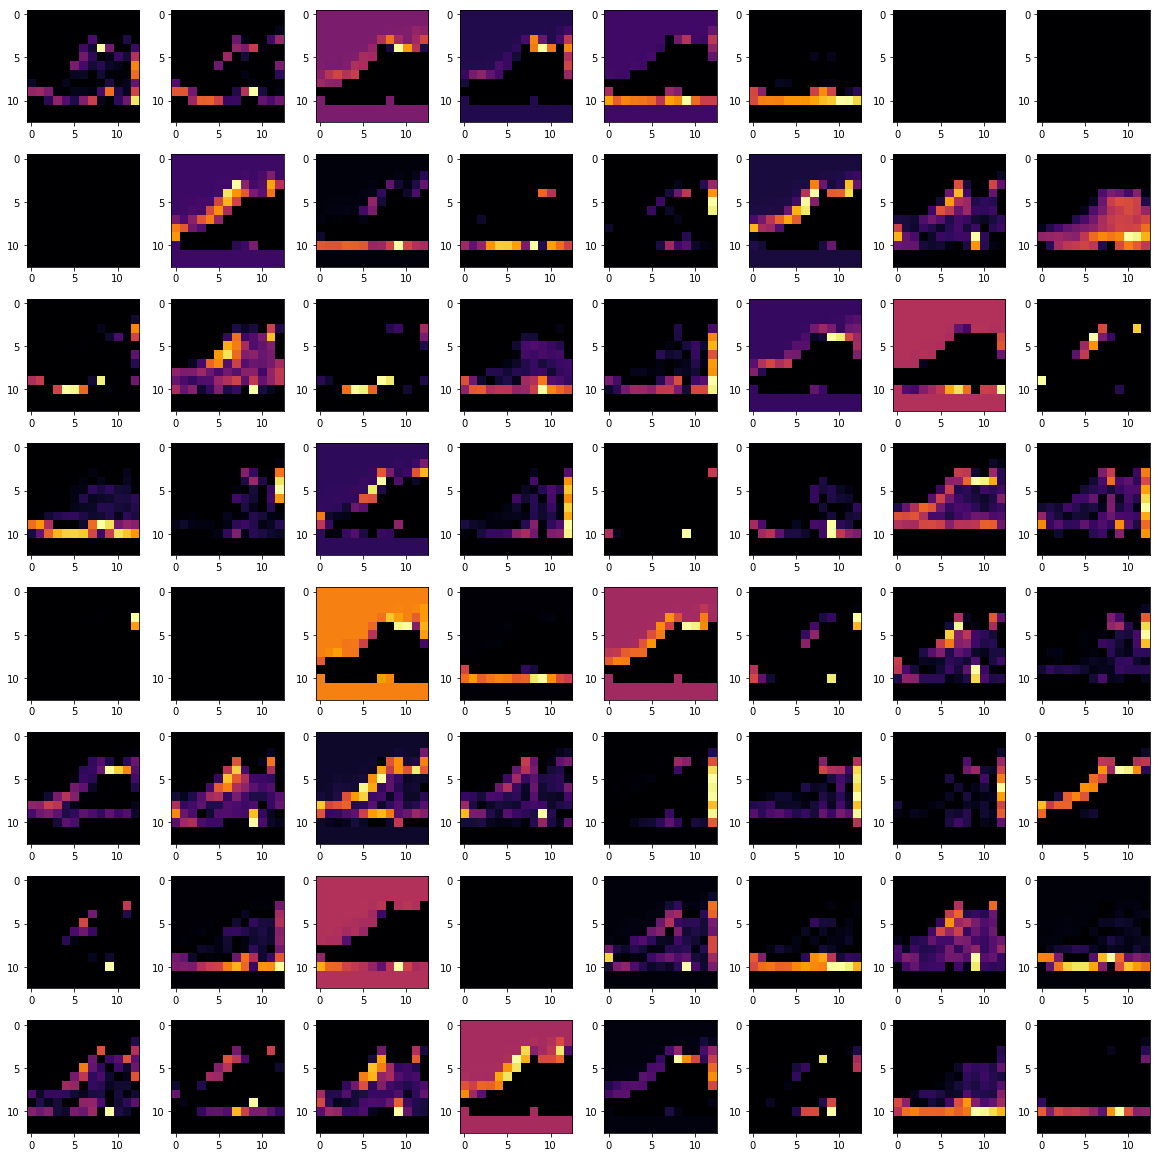

In [142]:
f, axarr = plt.subplots(8, 8, figsize=(16,16), constrained_layout=True)

# f.tight_layout()

IMAGE_NUMBER = 0


layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

for i in range(0, 8):
    for convolution_number in range(0, 8):
        f1 = activation_model.predict(test_data[IMAGE_NUMBER].reshape(1, 28, 28, 1))[1]
        axarr[i, convolution_number].imshow(f1[0, :, :, convolution_number + (i* 8)], cmap='inferno')

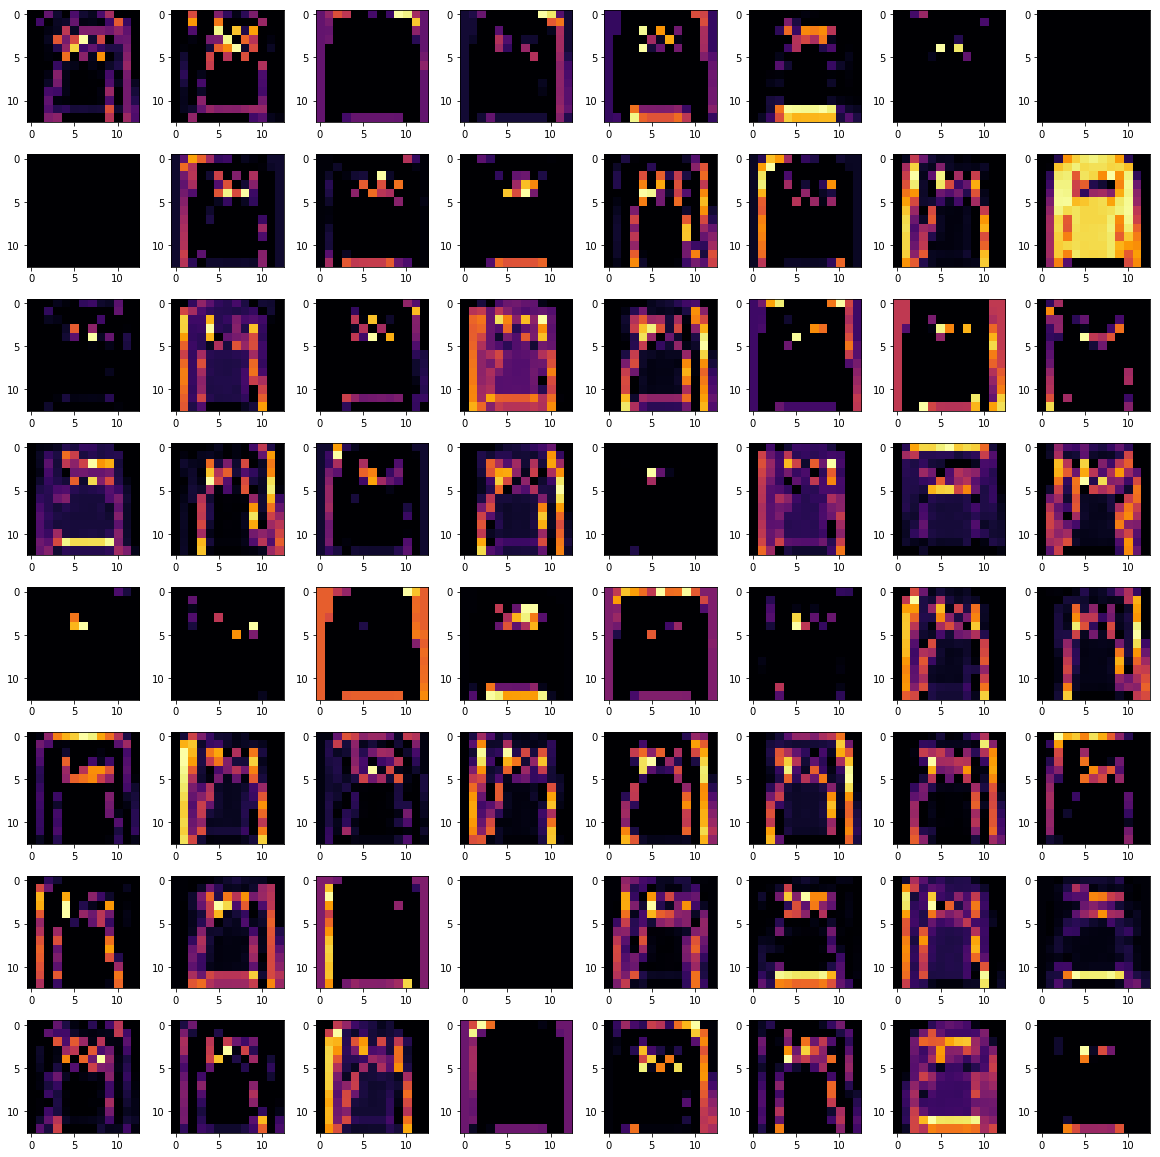

In [145]:
f, axarr = plt.subplots(8, 8, figsize=(16,16), constrained_layout=True)

# f.tight_layout()

IMAGE_NUMBER = 1


layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

for i in range(0, 8):
    for convolution_number in range(0, 8):
        f1 = activation_model.predict(test_data[IMAGE_NUMBER].reshape(1, 28, 28, 1))[1]
        axarr[i, convolution_number].imshow(f1[0, :, :, convolution_number + (i* 8)], cmap='inferno')

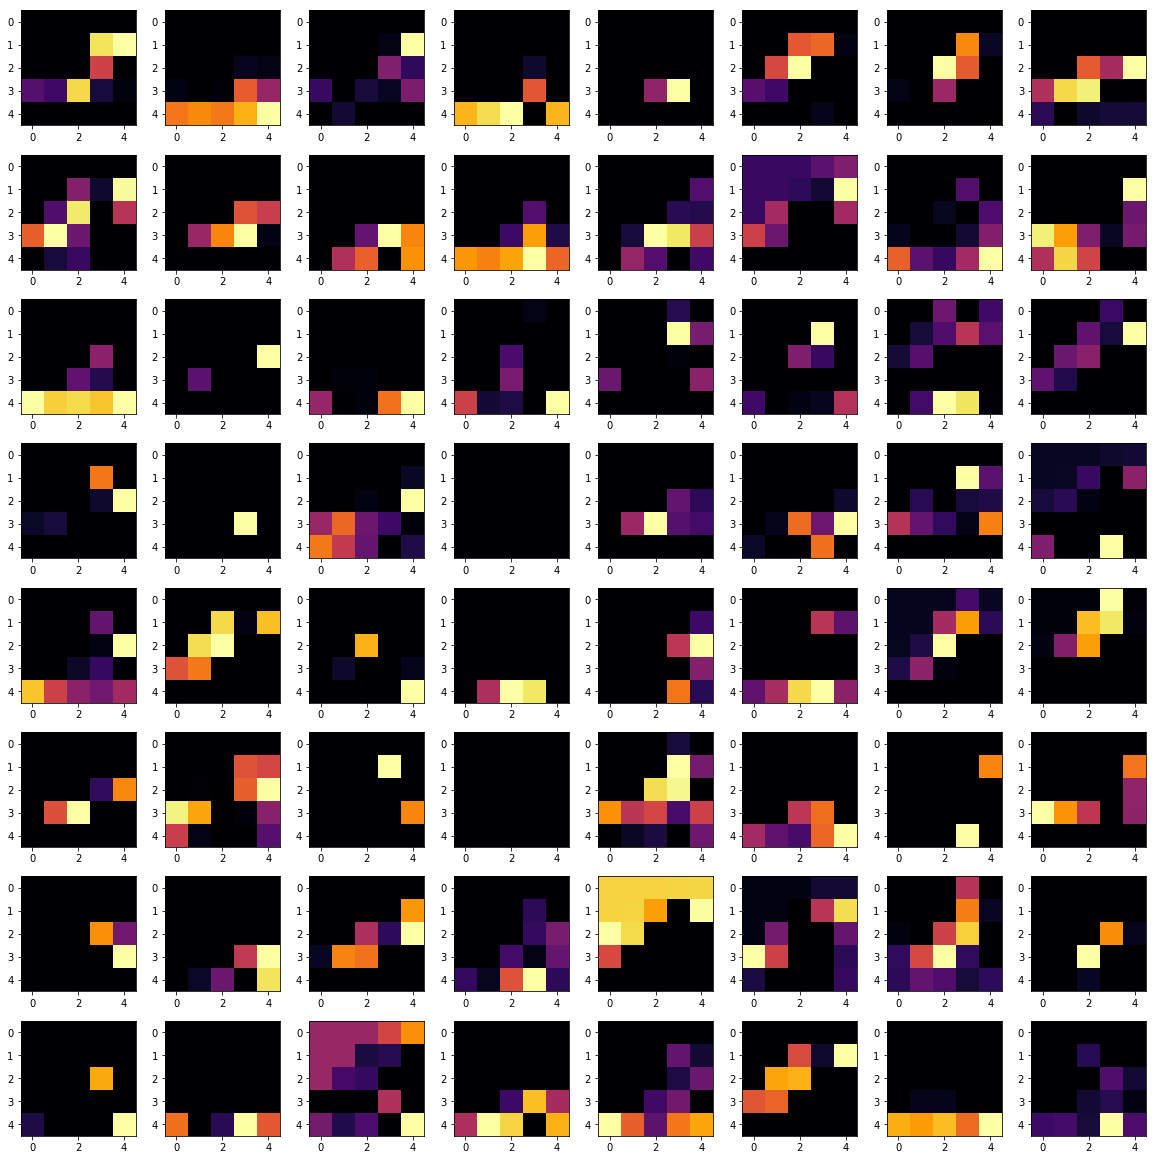

In [161]:
f, axarr = plt.subplots(8, 8, figsize=(16,16), constrained_layout=True)

# f.tight_layout()

IMAGE_NUMBER = 0


layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

for i in range(0, 8):
    for convolution_number in range(0, 8):
        f1 = activation_model.predict(test_data[IMAGE_NUMBER].reshape(1, 28, 28, 1))[3]
        axarr[i, convolution_number].imshow(f1[0, :, :, convolution_number + (i* 8)], cmap='inferno')

# CHANGING CONV LAYERS

In [192]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [193]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [197]:
start = timeit.default_timer()

print(model.fit(train_data, train_labels, epochs=5, verbose=1))

stop = timeit.default_timer()

print('Time: ', stop - start)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 15s 249us/sample - loss: 0.2441 - accuracy: 0.9084
Epoch 2/5
60000/60000 [==============================] - 17s 285us/sample - loss: 0.2252 - accuracy: 0.9142
Epoch 3/5
60000/60000 [==============================] - 17s 291us/sample - loss: 0.2165 - accuracy: 0.9185
Epoch 4/5
60000/60000 [==============================] - 17s 286us/sample - loss: 0.2006 - accuracy: 0.9237
Epoch 5/5
60000/60000 [==============================] - 17s 289us/sample - loss: 0.1877 - accuracy: 0.9286
Time:  84.07822896400467


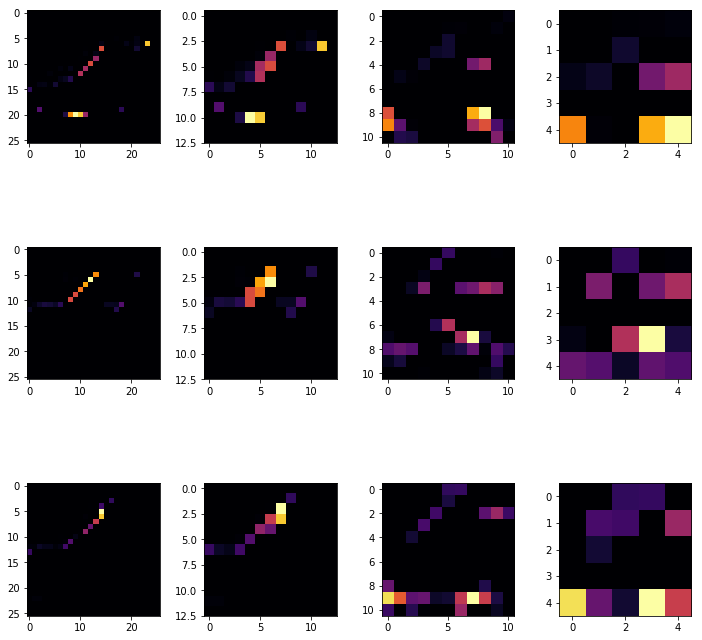

In [199]:
f, axarr = plt.subplots(3, 4, figsize=(10,10))
f.tight_layout()

FIRST_IMAGE = 0
SECOND_IMAGE =23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 1
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0, 4):
    f1 = activation_model.predict(test_data[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[0, x].grid(False)
    f2 = activation_model.predict(test_data[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[1, x].grid(False)
    f3 = activation_model.predict(test_data[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[2, x].grid(False)

In [200]:
model = keras.models.Sequential([
    keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [201]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [204]:
start = timeit.default_timer()

print(model.fit(train_data, train_labels, epochs=5, verbose=1))

stop = timeit.default_timer()

print('Time: ', stop - start)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 66s 1ms/sample - loss: 0.2432 - accuracy: 0.9092
Epoch 2/5
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.2275 - accuracy: 0.9154
Epoch 3/5
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.2138 - accuracy: 0.9184
Epoch 4/5
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.2000 - accuracy: 0.9249
Epoch 5/5
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.1839 - accuracy: 0.9304
Time:  350.23961040998984


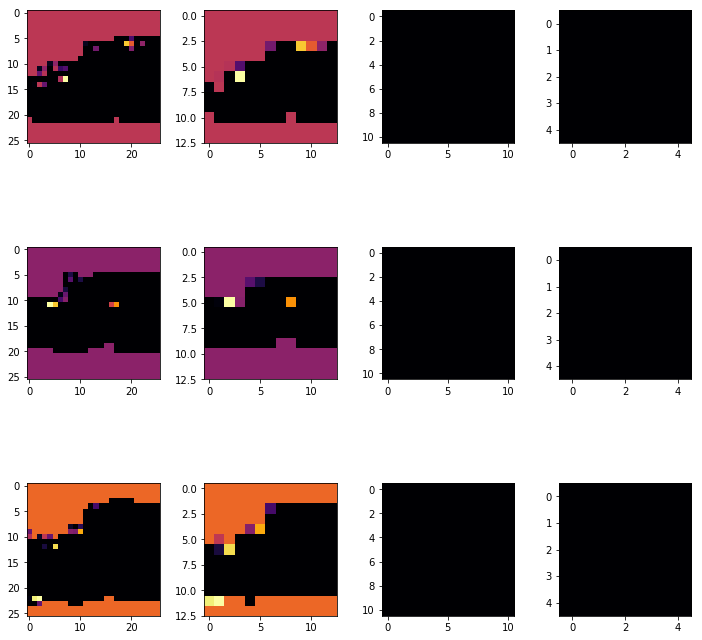

In [207]:
f, axarr = plt.subplots(3, 4, figsize=(10,10))
f.tight_layout()

FIRST_IMAGE = 0
SECOND_IMAGE =23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 3
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0, 4):
    f1 = activation_model.predict(test_data[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[0, x].grid(False)
    f2 = activation_model.predict(test_data[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[1, x].grid(False)
    f3 = activation_model.predict(test_data[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[2, x].grid(False)

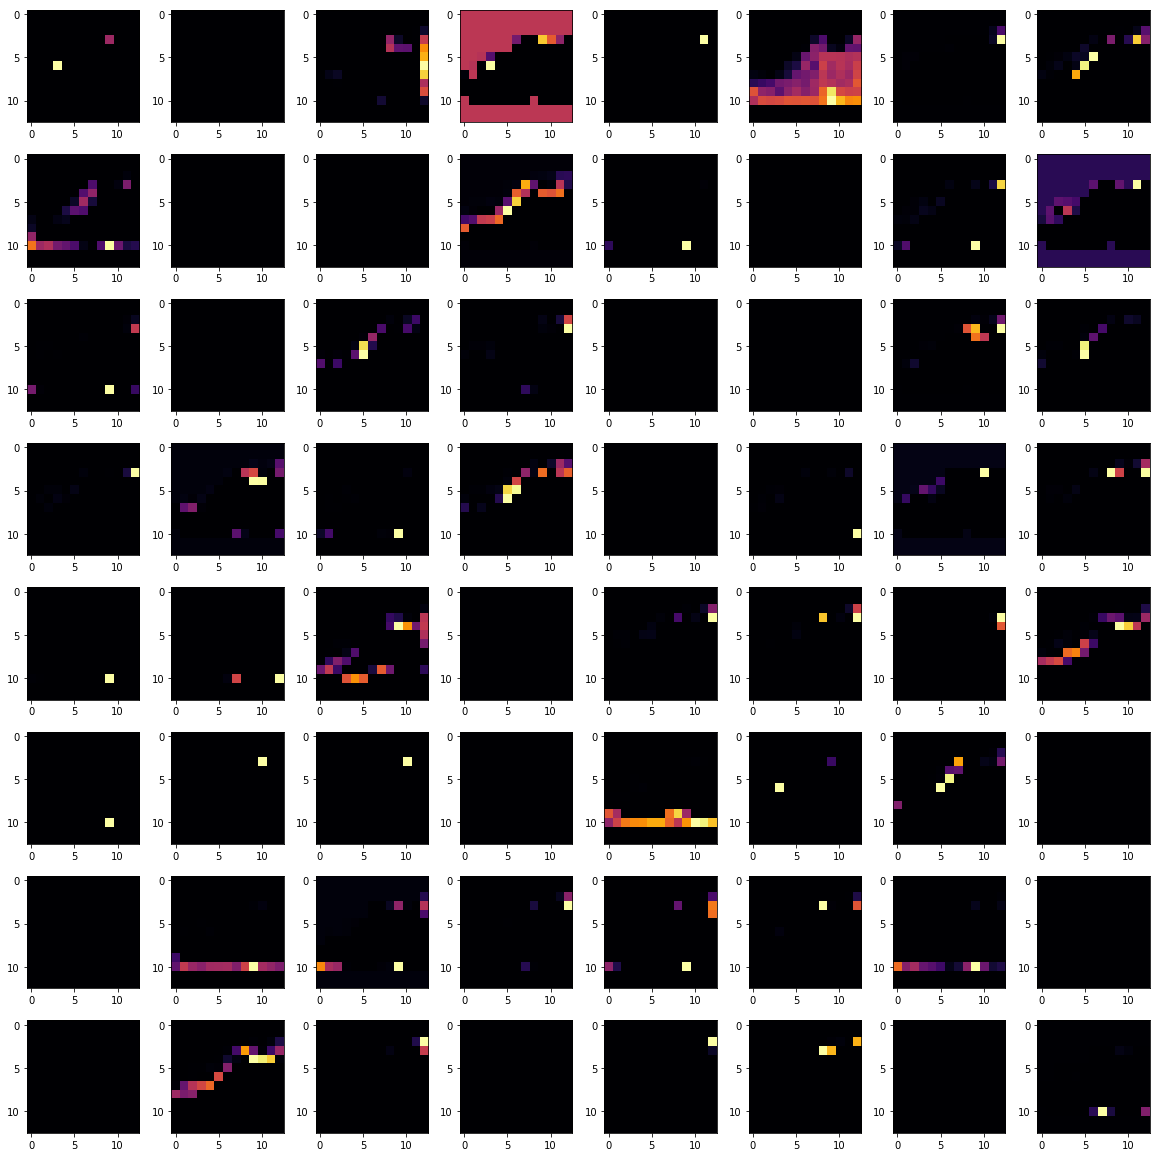

In [209]:
f, axarr = plt.subplots(8, 8, figsize=(16,16), constrained_layout=True)

# f.tight_layout()

IMAGE_NUMBER = 0


layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs = model.input, outputs = layer_outputs)

for i in range(0, 8):
    for convolution_number in range(0, 8):
        f1 = activation_model.predict(test_data[IMAGE_NUMBER].reshape(1, 28, 28, 1))[1]
        axarr[i, convolution_number].imshow(f1[0, :, :, convolution_number + (i* 8)], cmap='inferno')